In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist # Changed 'dataset' to 'datasets'
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D # Changed 'layer' to 'layers' and updated case of input, conv2D and MaxPooling2D
from tensorflow.keras.optimizers import Adam # Changed 'optimizer' to 'optimizers'

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

In [ ]:
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [ ]:
input_img = Input(shape=(28,28,1))

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D # Changed 'layer' to 'layers' and updated case of input, conv2D and MaxPooling2D

# ... other code ...

input_img = Input(shape=(28,28,1))

# Use Conv2D and MaxPooling2D (capitalized)
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [ ]:
x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)

x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.3000 - val_loss: 0.1474
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1419 - val_loss: 0.1278
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1264 - val_loss: 0.1197
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1189 - val_loss: 0.1138
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1138 - val_loss: 0.1100
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1107 - val_loss: 0.1074
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1080 - val_loss: 0.1053
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1062 - val_loss: 0.1040
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1048 - val_loss: 0.1023
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1032 - val_loss: 0.1012
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1020 - val_loss: 0.1003
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/st

In [ ]:
decoded_img = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


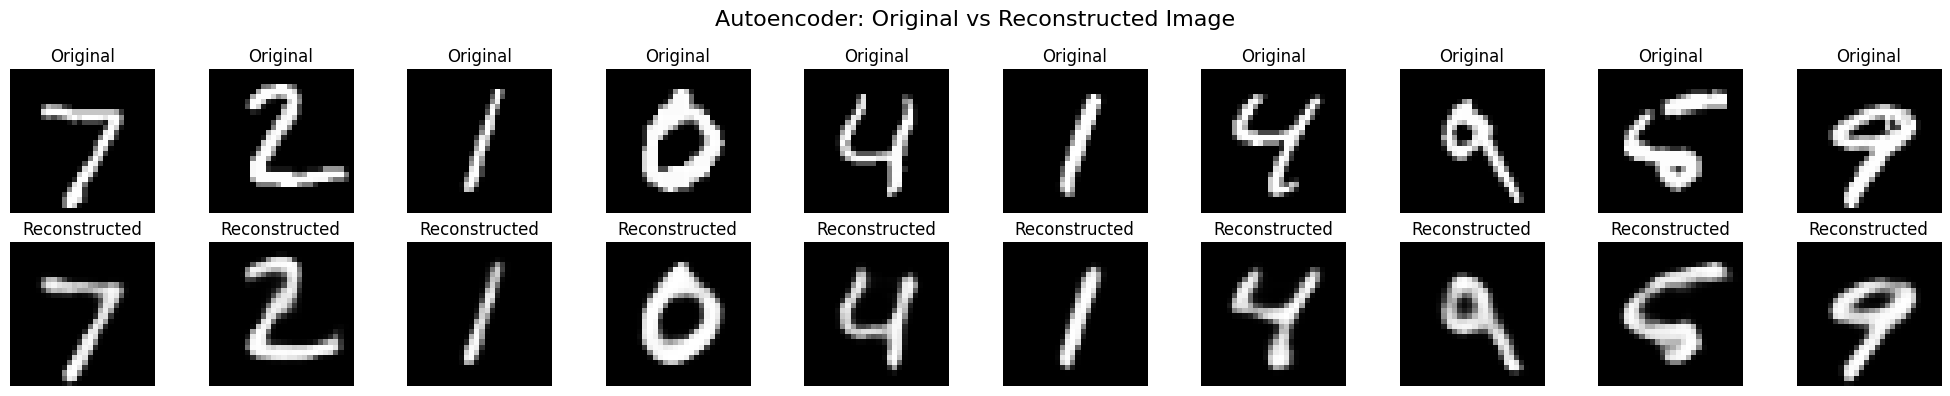

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title('Original')
    plt.axis('off')
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(autoencoder.predict(x_test[i].reshape(1,28,28,1)).reshape(28,28),cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.suptitle("Autoencoder: Original vs Reconstructed Image",fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist # Changed 'dataset' to 'datasets'
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D # Changed 'layer' to 'layers' and updated case of input, conv2D and MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()




In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

In [ ]:
input_img = Input(shape=(28, 28, 1))

e1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
e2 = MaxPooling2D((2, 2), padding='same')(e1)
e3 = Conv2D(8, (3, 3), activation='relu', padding='same')(e2)
e4 = MaxPooling2D((2, 2), padding='same')(e3)
e5 = Conv2D(8, (3, 3), activation='relu', padding='same')(e4)
encoded = MaxPooling2D((2, 2), padding='same')(e5)


d1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
d2 = UpSampling2D((2, 2))(d1)
d3 = Conv2D(8, (3, 3), activation='relu', padding='same')(d2)
d4 = UpSampling2D((2, 2))(d3)
d5 = Conv2D(16, (3, 3), activation='relu')(d4)
d6 = UpSampling2D((2, 2))(d5)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d6) # Output layer

In [ ]:
autoencoder=Model(input_img,decoded)
autoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train,x_train,epochs=15,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.3096 - val_loss: 0.1463
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1406 - val_loss: 0.1251
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1239 - val_loss: 0.1165
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1164 - val_loss: 0.1109
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1110 - val_loss: 0.1069
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1074 - val_loss: 0.1041
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1050 - val_loss: 0.1022
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1029 - val_loss: 0.1005
Epoch 9/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1014 - val_loss: 0.0993
Epoch 10/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1001 - val_loss: 0.0983
Epoch 11/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0994 - val_loss: 0.0974
Epoch 12/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

In [ ]:
encoder_layers=[e1,e2,e3,e4,e5,encoded]
decoder_layers=[d1,d2,d3,d4,d5,d6,decoded]
layer_models=[Model(inputs=input_img,outputs=layer) for layer in encoder_layers+decoder_layers]

In [ ]:
idx=0
test_img=x_test[idx].reshape(1,28,28,1)
layer_outputs=[model.predict(test_img) for model in layer_models]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


In [ ]:
titles=[
    "Input","Encoder Conv2D (16)","Encoder MaxPool",
    "Encoder Conv2D (8)","Encoder MaxPool",
    "Encoder Conv2D (8)","Encoded Representation",
    "Decoder Conv2D (8)","Decoder Upsample",
    "Decoder Conv2D (8)","Decoder Upsample",
    "Decoder Conv2D (16)","Decoder Upsample",
    "Reconstructed"
]

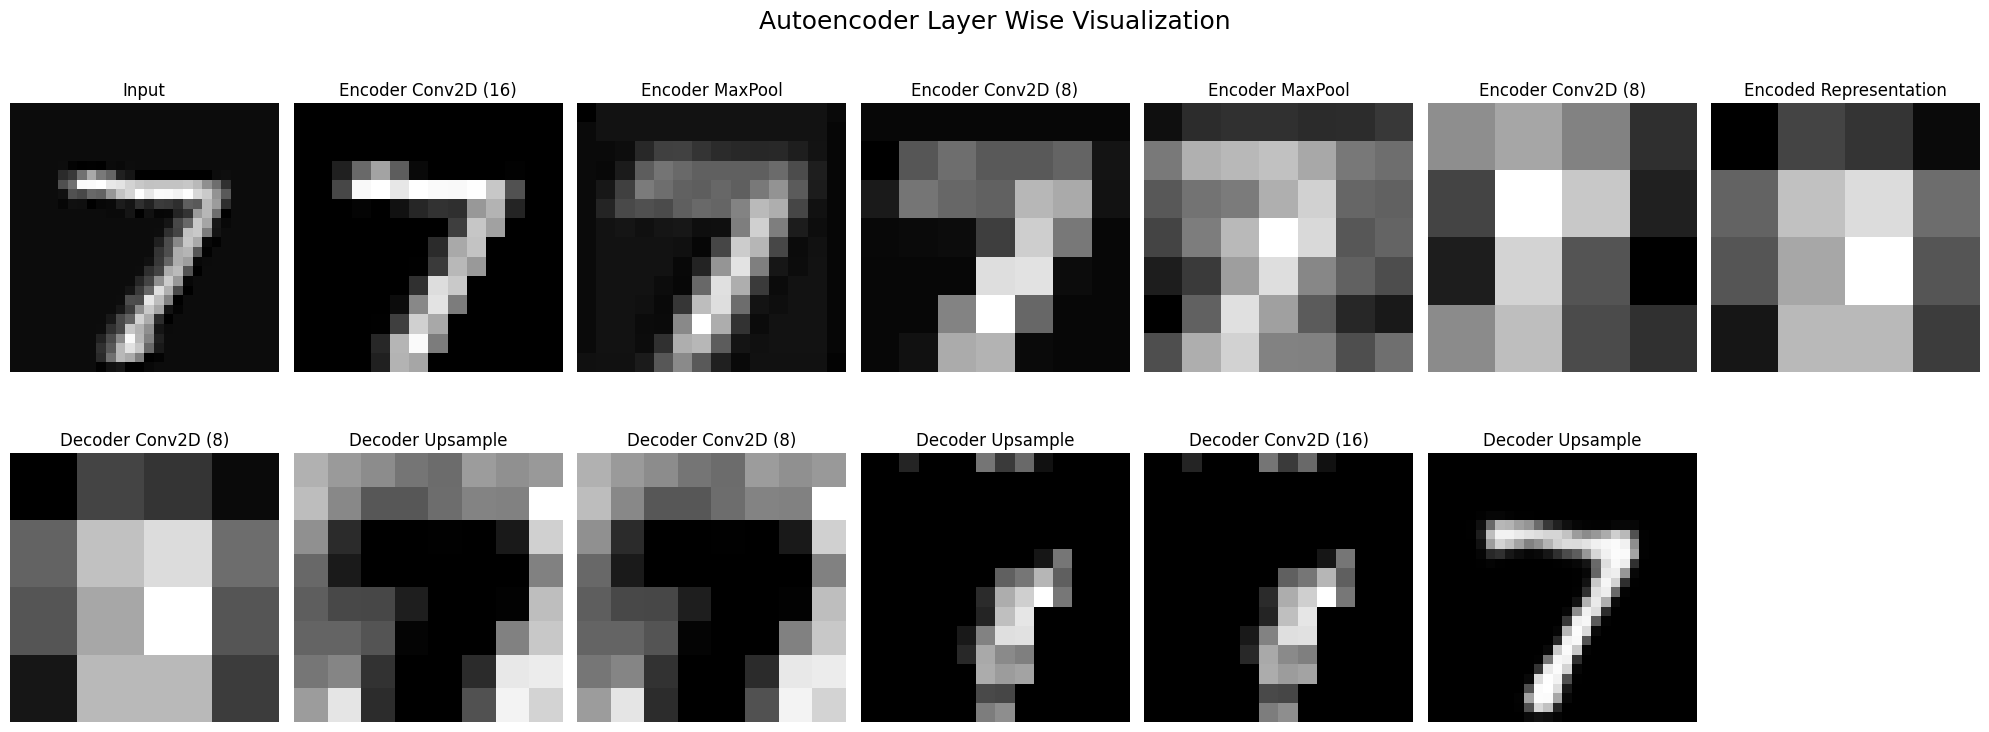

In [ ]:
plt.figure(figsize=(20,8))
n_layers=len(layer_outputs)
for i in range(n_layers):
    ax=plt.subplot(2,(n_layers+1)//2,i+1)
    output=layer_outputs[i][0,:,:,0]
    plt.imshow(output,cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.suptitle("Autoencoder Layer Wise Visualization",fontsize=18)
plt.tight_layout()
plt.show()

Epoch 1/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - loss: 0.0371 - val_loss: 0.0481 - learning_rate: 0.0010
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - loss: 0.0175 - val_loss: 0.0266 - learning_rate: 0.0010
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0155 - val_loss: 0.0155 - learning_rate: 0.0010
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0145 - val_loss: 0.0125 - learning_rate: 0.0010
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0138 - val_loss: 0.0116 - learning_rate: 0.0010
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0133 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0129 - val_loss: 0.0109 - learning_rate: 0.0010
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0126 - val_loss: 0.0105 - learning_rate: 0.0010
Epoch 9/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0123 - val_loss: 0.0100 - learning_rat

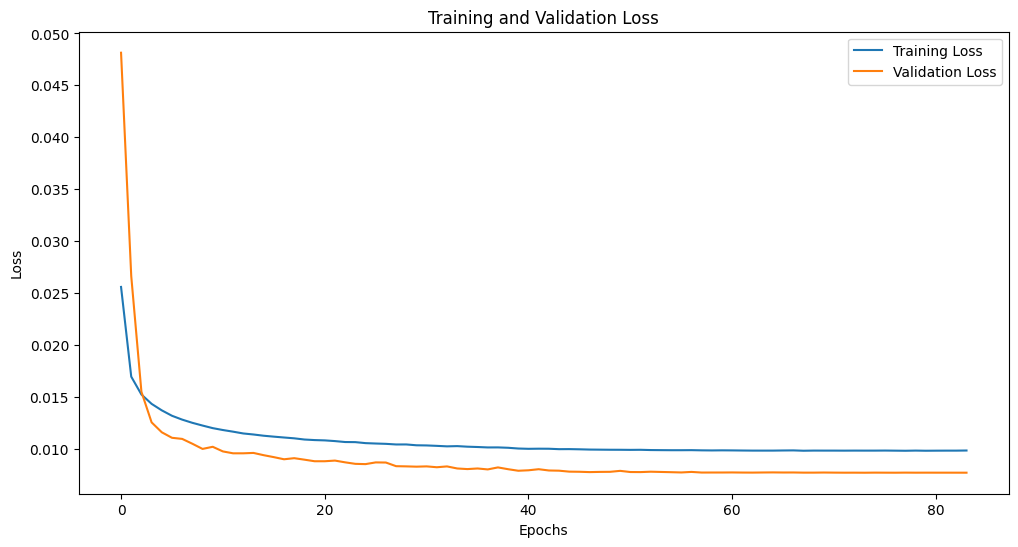

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


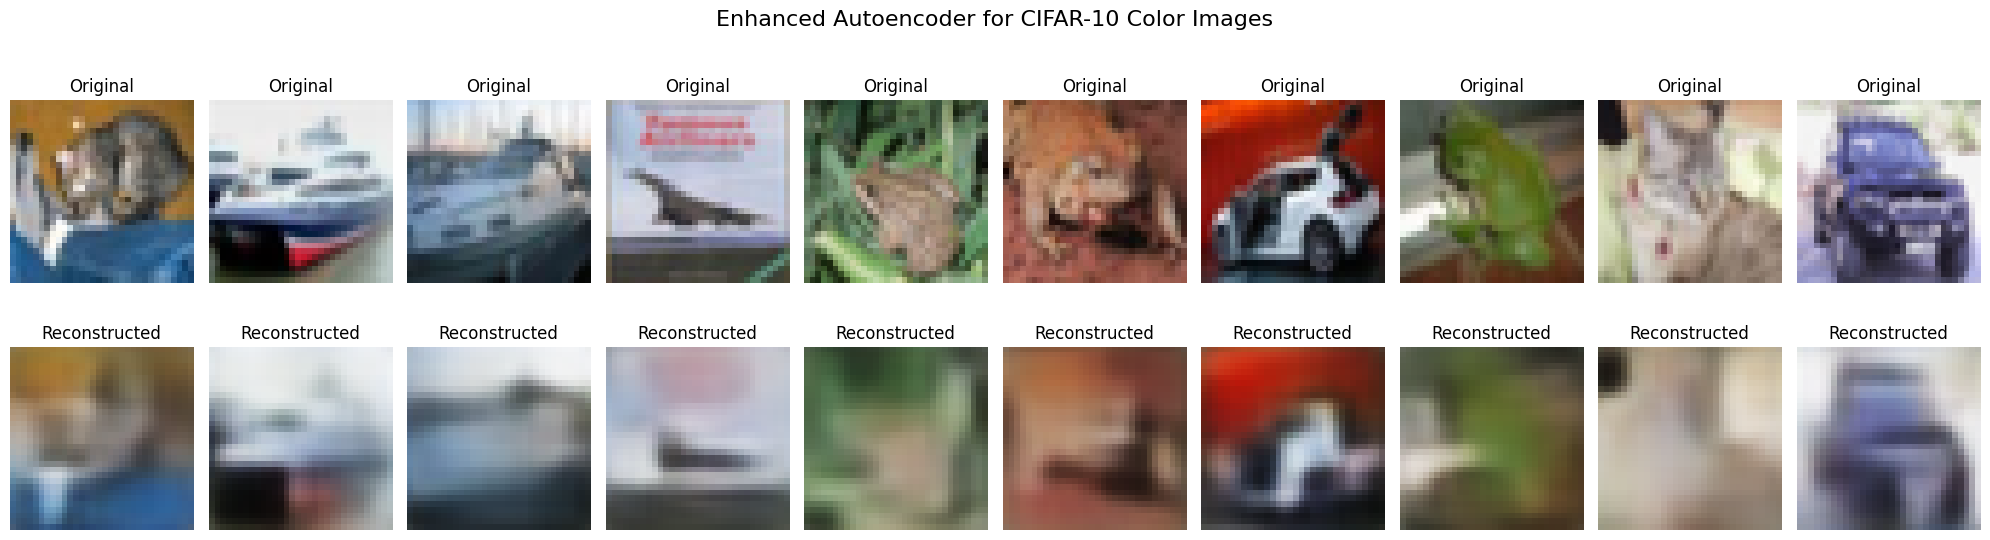

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load CIFAR-10 dataset (color images)
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Input shape is now (32, 32, 3) for color images
input_img = Input(shape=(32, 32, 3))

# Enhanced Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Enhanced Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 3 channels for RGB output

# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  # Using MSE for color images

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Encode and decode some images from the test set
decoded_imgs = autoencoder.predict(x_test[:10])  # Only predict first 10 for display

# Display original and reconstructed images
plt.figure(figsize=(20, 6))
for i in range(10):
    # Display original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.suptitle("Enhanced Autoencoder for CIFAR-10 Color Images", fontsize=16)
plt.tight_layout()
plt.show()

# Save the model
autoencoder.save('cifar10_autoencoder.h5')